In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d harshsingh2209/supply-chain-analysis

  0% 0.00/9.12k [00:00<?, ?B/s]
100% 9.12k/9.12k [00:00<00:00, 18.4MB/s]


In [2]:
!mkdir dataset
!unzip supply-chain-analysis.zip -d dataset

Archive:  supply-chain-analysis.zip
  inflating: dataset/supply_chain_data.csv  


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [4]:
df = pd.read_csv('/content/dataset/supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

**Data Cleaning**

In [9]:
#Duplicated Check
df.duplicated().sum()

0

In [10]:
#NAN check
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

<Axes: xlabel='Costs'>

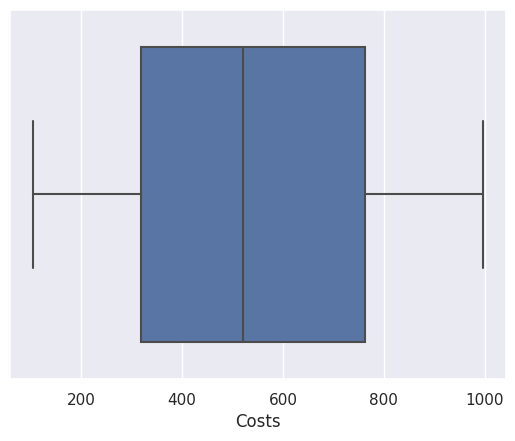

In [36]:
#Outlier Detecting
sns.boxplot(x=df['Costs'])

#not found outlier

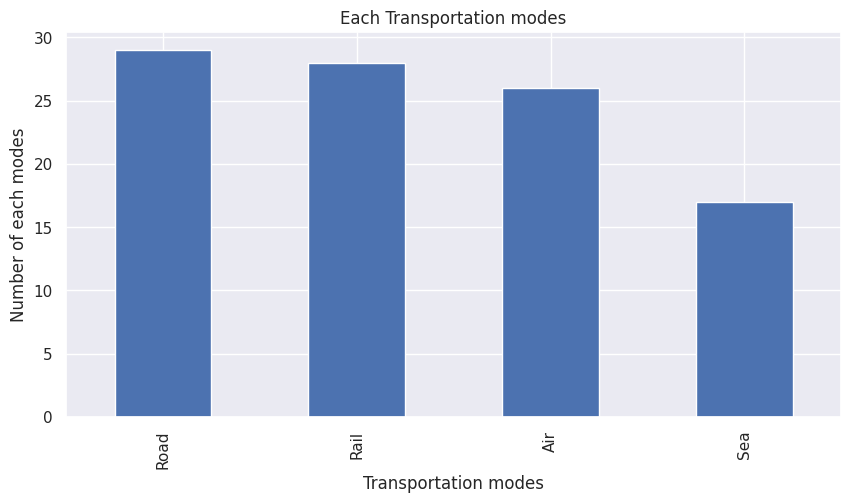

In [28]:
df['Transportation modes'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Each Transportation modes")
plt.ylabel('Number of each modes')
plt.xlabel('Transportation modes');

<Axes: ylabel='Product type'>

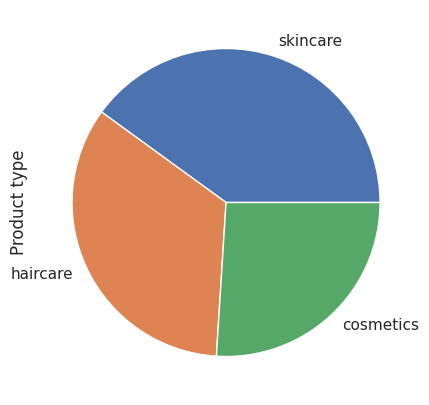

In [31]:
df['Product type'].value_counts().plot(kind='pie', figsize=(10,5),)

<ipython-input-21-fe2252758f39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

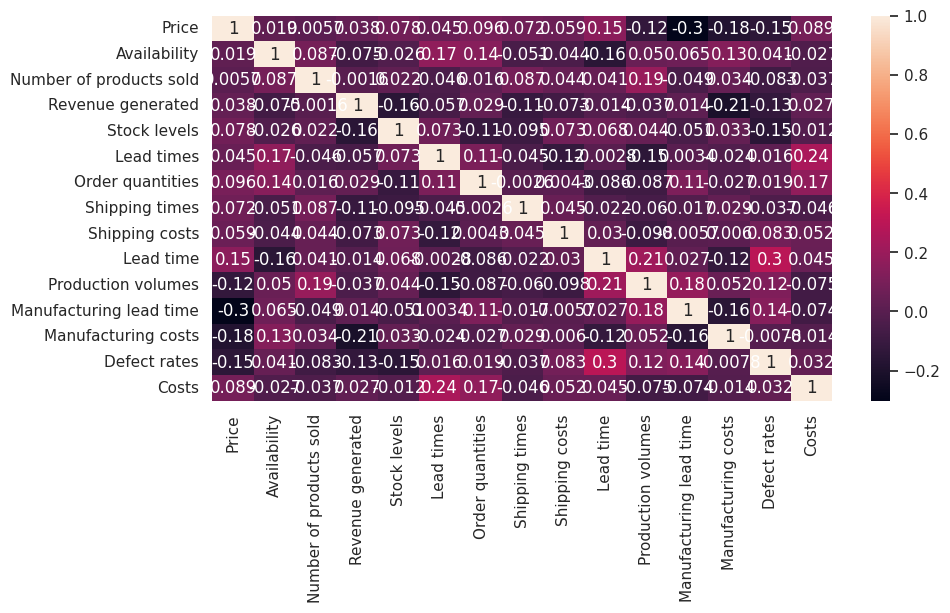

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

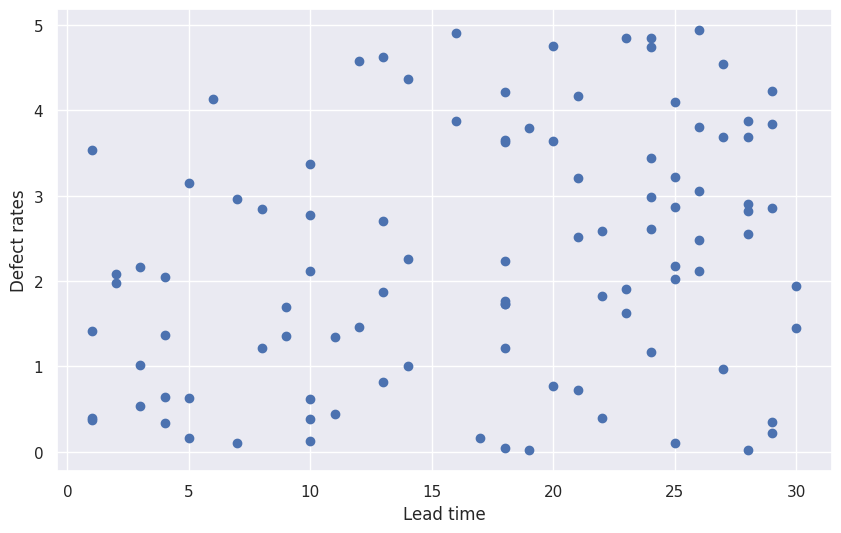

In [25]:
#I choose Lead time and Defect rates becasue corr is the highest but is is not linear
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Lead time'], df['Defect rates'])
ax.set_xlabel('Lead time')
ax.set_ylabel('Defect rates')
plt.show()

**Feature Encoding**


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
for col in df.columns:
  if df[col].dtypes == 'object':
    df[col] = le.fit_transform(df[col])


In [39]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,1,0,69.808006,55,802,8661.996792,2,58,7,96,...,4,29,215,29,46.279879,2,0.226410,2,1,187.752075
1,2,1,14.843523,95,736,7460.900065,0,53,30,37,...,4,23,517,30,33.616769,2,4.854068,2,1,503.065579
2,1,12,11.319683,34,8,9577.749626,3,1,10,88,...,4,12,971,27,30.688019,2,4.580593,0,2,141.920282
3,2,23,61.163343,68,83,7766.836426,2,23,13,59,...,3,24,937,18,35.624741,0,4.746649,1,0,254.776159
4,2,34,4.805496,26,871,2686.505152,2,5,3,56,...,2,5,414,3,92.065161,0,3.145580,0,0,923.440632


<Axes: >

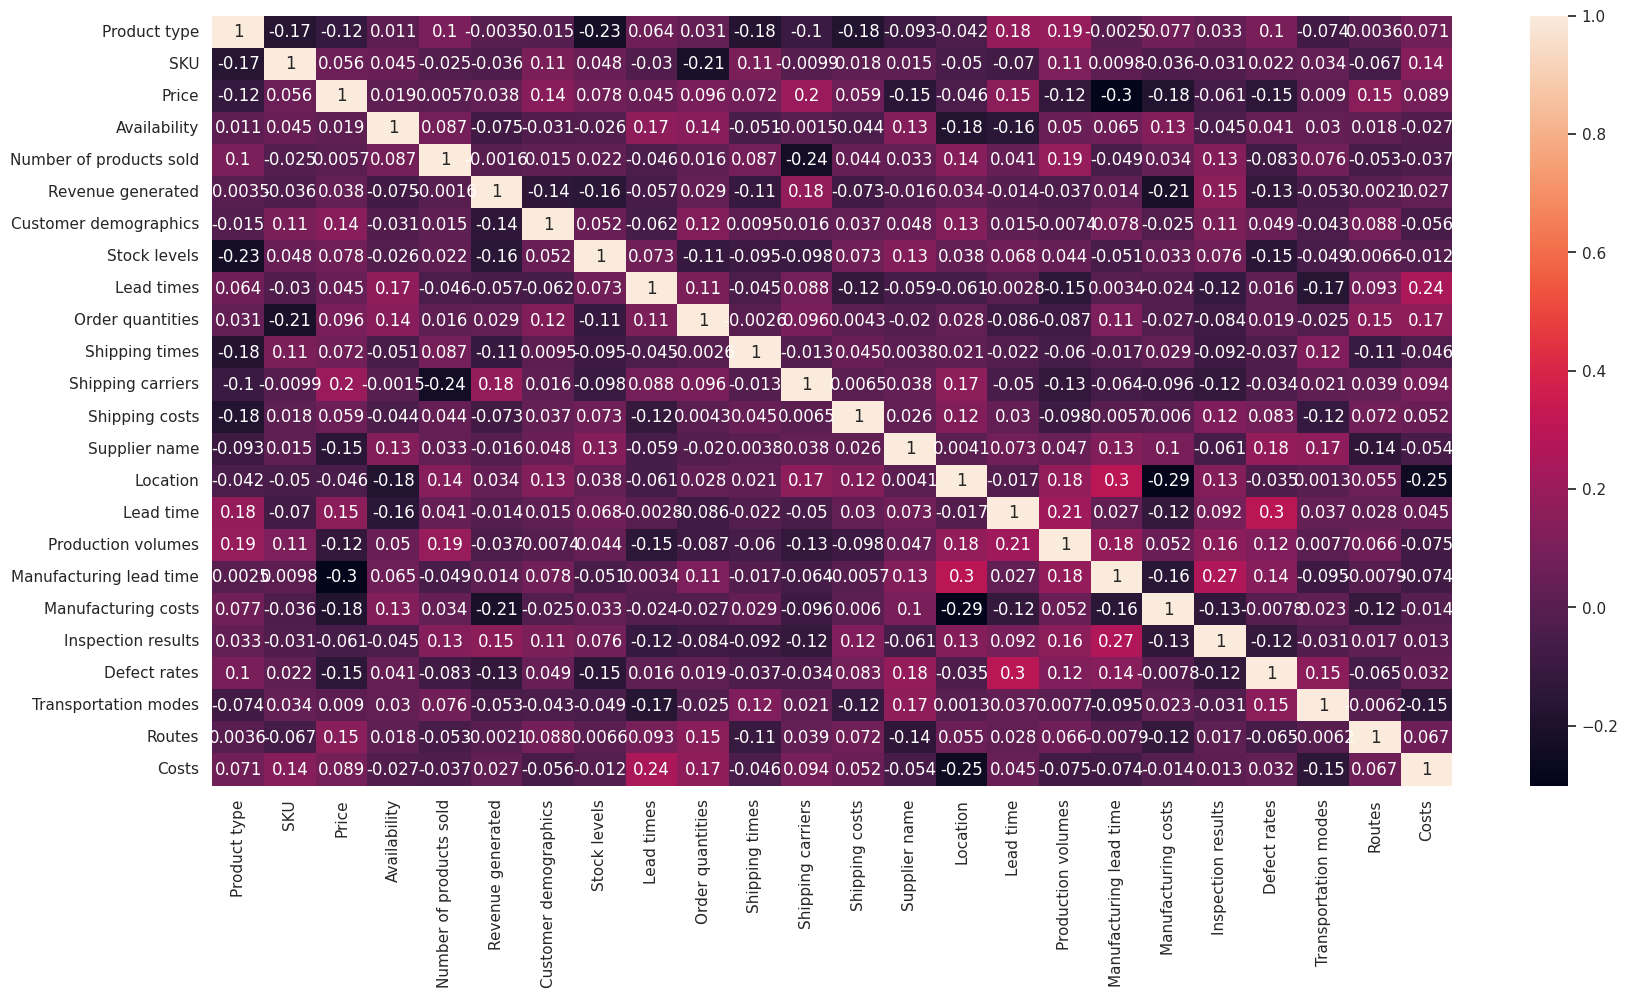

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

**After LabelEncoding, I think it will be increase corr but it is not.**